---
# Classificação de Demandas do Fala.BR - LLM (DistilBERT)
Projeto do Bootcamp Machine Learning (Anderson Monteiro e Léo Maranhão de Mello)
---
## Introdução
### Descrição do projeto de Machine Learning

**I Descrição do problema ou tarefa**: O problema consiste em classificar as demandas recebidas pela Ouvidoria da SUSEP, por meio do sistema Fala.BR.

**II Descrição da solução de IA:** Utilizaremos um processamento de NLP e testaremos modelos de regressão logística e Random Forest para classificação. A solução incluirá uma pipeline que realiza pré-processamento, treinamento e avaliação do modelo.

**III Fonte de dados:** A Ouvidoria forneceu um dataset com 1531 textos das demandas e suas classificações, no formato de planilha ODS. A classificação dos textos foi realizada pela própria Ouvidoria.

**IV Variáveis independentes (preditoras ou "features"):** A variável independente é o texto recebido do Fala.BR.

**V Variável dependente (resposta ou "target"):** A variável dependente é a classificação do texto em uma das 17 classificações utilizadas pela Ouvidoria:

*Cadastro
*Capitalização
*Consulta Técnica

Classificação de Demandas do Fala.BR - SMOTE com ChatGPT
Projeto do Bootcamp Machine Learning (Anderson Monteiro e Léo Maranhão de Mello)

Introdução
Descrição do projeto de machine learning
1- Descrição do problema ou tarefa: O problema consiste em classificar as demandas recebidas pela Ouvidoria da SUSEP, por meio do sistema Fala.BR.

2- Descrição da solução de IA: Utilizaremos um processamento de NLP e testaremos modelos de regressão logística e Random Forest para classificação. A solução incluirá uma pipeline que realiza pré-processamento, treinamento e avaliação do modelo.

3- Fonte de dados: A Ouvidoria forneceu um dataset com 1531 textos das demandas e suas classificações, no formato de planilha ODS. A classificação dos textos foi realizada pela própria Ouvidoria.

4- Variáveis independentes (preditoras ou "features"): A variável independente é o texto recebido do Fala.BR.

5- Variável dependente (resposta ou "target"): A variável dependente é a classificação do texto em uma das 17 classificações utilizadas pela Ouvidoria:


Classificação de Demandas do Fala.BR - SMOTE com ChatGPT
Projeto do Bootcamp Machine Learning (Anderson Monteiro e Léo Maranhão de Mello)

Introdução
Descrição do projeto de machine learning
1- Descrição do problema ou tarefa: O problema consiste em classificar as demandas recebidas pela Ouvidoria da SUSEP, por meio do sistema Fala.BR.

2- Descrição da solução de IA: Utilizaremos um processamento de NLP e testaremos modelos de regressão logística e Random Forest para classificação. A solução incluirá uma pipeline que realiza pré-processamento, treinamento e avaliação do modelo.

3- Fonte de dados: A Ouvidoria forneceu um dataset com 1531 textos das demandas e suas classificações, no formato de planilha ODS. A classificação dos textos foi realizada pela própria Ouvidoria.

4- Variáveis independentes (preditoras ou "features"): A variável independente é o texto recebido do Fala.BR.

5- Variável dependente (resposta ou "target"): A variável dependente é a classificação do texto em uma das 17 classificações utilizadas pela Ouvidoria:

* Cadastro
* Capitalização
* Consulta Técnica
* DPVAT/SPVAT
* Não identificada
* Previdência Complementar Aberta
* Seguro Compreensivo
* Seguro de Automoveis
* Seguro de Crédito Interno
* Seguro de Danos
* Seguro de Pessoas
* Seguro de Responsabilidade
* Seguro de Transportes
* Seguro Fiança Locatícia
* Seguro Garantia
* Seguro Garantia Estendida
* Seguro RuralCadastro
* Capitalização
* Consulta Técnica
* DPVAT/SPVAT
* Não identificada
* Previdência Complementar Aberta
* Seguro Compreensivo
* Seguro de Automoveis
* Seguro de Crédito Interno
* Seguro de Danos
* Seguro de Pessoas
* Seguro de Responsabilidade
* Seguro de Transportes
* Seguro Fiança Locatícia
* Seguro Garantia
* Seguro Garantia Estendida
* Seguro RuralDPVAT/SPVAT
* Não identificada
* Previdência Complementar Aberta
* Seguro Compreensivo
* Seguro de Automoveis
* Seguro de Crédito Interno
* Seguro de Danos
* Seguro de Pessoas
* Seguro de Responsabilidade
* Seguro de Transportes
* Seguro Fiança Locatícia
* Seguro Garantia
* Seguro Garantia Estendida
* Seguro Rural

In [ ]:
# bibliotecas internas
import os

# bibliotecas padrão
import pandas as pd
import numpy as np
import re
import warnings
#warnings.filterwarnings('ignore')

# Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# PyTorch
import torch
from torch.utils.data import DataLoader, TensorDataset

# Spacy
!python -m spacy download pt_core_news_sm
import spacy

# outros
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE



!pip install odfpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 55.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Carga dos Dados

In [ ]:
# Monta o Google Drive
drive.mount('/content/drive')

# Cria o dataframe de trabalho
df = pd.DataFrame()

# Le os arquivos de dados e monta a estrutura
directory = os.fsencode("/content/drive/MyDrive/Colab Notebooks/MVP/data/")
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.startswith("todas_demandas"):
        df_temp = pd.read_excel(f"/content/drive/MyDrive/Colab Notebooks/MVP/data/{filename}")
        df = pd.concat([df, df_temp])

# Exibe a estrutura montada
display(df.sample(5))
display(df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Demanda,Categoria
314,"Goiânia, 33 de abril de 3333.Registro de Recla...",Não identificada
7,Ao revisar as cláusulas do contrato de seguro ...,Seguro de Danos
202,Realizei uma cotação de seguro com um corretor...,Não identificada
345,Realizei a compra do seguros de auto em 33.33....,Seguro de Automoveis
352,"Caros boa tarde Necessito de copia, link de ac...",Não identificada


(2966, 2)

## Pré processamento

In [ ]:
text_column = 'Demanda'
target = 'Categoria'

# Semente global
seed = np.random.seed(1)

# Labels
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Holdout
X_train, X_test, y_train, y_test = train_test_split(df[text_column], df[target], test_size=0.2, random_state=42, stratify=df[target])

# Minusculas
X_train = X_train.str.lower()
X_test = X_test.str.lower()

# Stopwords
stop_words = set(stopwords.words('portuguese'))
X_train = X_train.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
X_test = X_test.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Sinais de pontuacao e numeros sao removidos do texto
X_train = X_train.apply(lambda x: re.sub(u'[^a-zA-ZáéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '', x))
X_test = X_test.apply(lambda x: re.sub(u'[^a-zA-ZáéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '', x))

# Remove quaisquer dois ou mais espacos em branco
X_train = X_train.apply(lambda x: re.sub(' {2,}', ' ', x))
X_test = X_test.apply(lambda x: re.sub(' {2,}', ' ', x))

# Lematizacao
nlp = spacy.load("pt_core_news_sm")

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

X_train = X_train.apply(lemmatize_text)
X_test = X_test.apply(lemmatize_text)

# TF-IDF
vectorizer = TfidfVectorizer(min_df=4, max_features=50000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Aplicação do SMOTE nos dados de treino
smote = SMOTE(random_state = seed)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [ ]:
# mostra os documentos codificados
feature_names = vectorizer.get_feature_names_out()
X_train_resampled = pd.DataFrame(X_train_resampled.toarray(), columns = feature_names)

## Holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

Criação e Avaliação dos Modelos: linha base

LR: 0.896596 (0.010575)
KNN: 0.846338 (0.019103)
CART: 0.875410 (0.014202)
SVM: 0.904091 (0.020813)
Bagging: 0.893700 (0.015372)
RF: 0.900757 (0.018564)
ET: 0.897439 (0.021280)
Ada: 0.564825 (0.094974)
GB: 0.914872 (0.014385)
Voting: 0.906987 (0.013239)


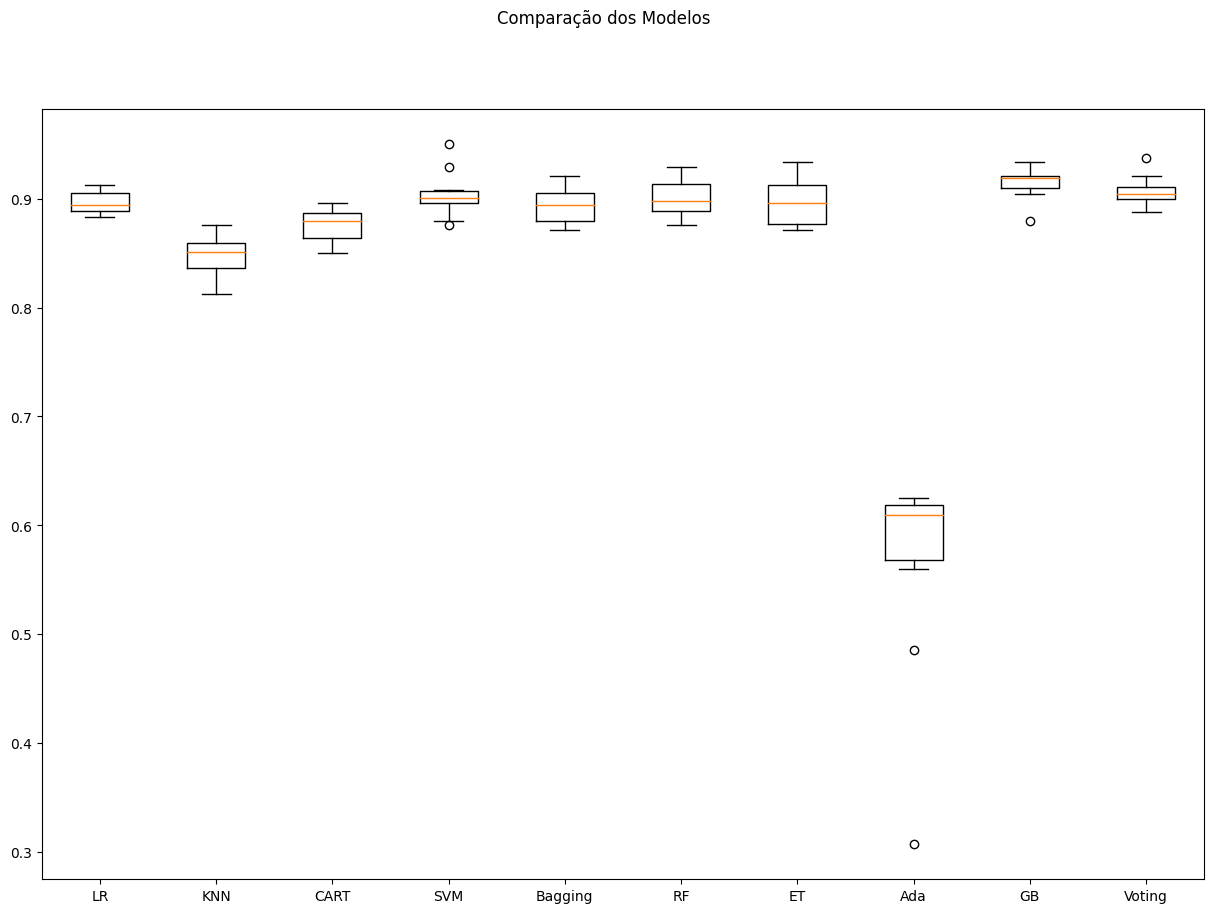

In [ ]:
# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na list de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos base para VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos (treinamento)
for name, model in models:
    cv_results = cross_val_score(model, X_train_resampled, y_train_resampled, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()